### Voting Classifier
- 다른 알고리즘 적용
- 다수결 예측

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Data Loading
cancer = load_breast_cancer()

data_df = pd.DataFrame(
     cancer.data
    ,columns=cancer.feature_names
)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# 데이터 분리
X_train,X_test,y_train,y_test=\
train_test_split(
    cancer.data
    ,cancer.target
    ,test_size=0.2
    ,random_state=156
)

In [16]:
# 모델객체 생성
lr_clf = LogisticRegression(max_iter=10000)
knn_clf=KNeighborsClassifier(n_neighbors=8)


In [17]:

# Voting 생성
vo_clf=VotingClassifier(
    # 사용할 알고리즘 [(내부이름,모델객체),(내부이름,모델객체)]
    estimators=[('LR',lr_clf),('KNN',knn_clf)]
    ,voting='soft' # 보팅 방식 설정 : Hard,soft(default)
)

In [18]:
sr_y_train=pd.Series(y_train)
sr_y_train.value_counts()

1    280
0    175
dtype: int64

In [20]:
#학습 ,예측 ,성능평가
vo_clf.fit(X_train,y_train)

pred=vo_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9473684210526315

In [21]:
clf_obj =[lr_clf,knn_clf]
for clf in clf_obj:
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accu=accuracy_score(y_test,pred)
    class_name=clf.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name,accu))

LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9386


### RandomForest

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# HAR 데이터셋을 가져오는 function
def get_human_dataset():
    # 피처명
    feature_name_df = \
    pd.read_csv(
          './data/HAR/features.txt'
        , sep='\s+'
        , header=None
        , names=['column_index', 'column_name']
    )
    
    # 피쳐명 추출
    feature_name = feature_name_df.iloc[:,1].values.tolist() # ndarray 를 list로 변환
    
    X_train = pd.read_csv(
          './data/HAR/train/X_train.txt'
        , sep='\s+'
        , header=None
#         , names=feature_name # 컬럼명 지정 -- ndarray 형식은 들어갈 수 없음!!!
    )
    
    X_test = pd.read_csv(
          './data/HAR/test/X_test.txt'
        , sep='\s+'
        , header=None
#         , names=feature_name
    )
    
    y_train = pd.read_csv(
          './data/HAR/train/y_train.txt'
        , sep='\s+'
        , header=None
        , names=['action']
    )
    
    y_test = pd.read_csv(
          './data/HAR/test/y_test.txt'
        , sep='\s+'
        , header=None
        , names=['action']
    )
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = get_human_dataset()

feature_name_df = \
    pd.read_csv(
          './data/HAR/features.txt'
        , sep='\s+'
        , header=None
        , names=['column_index', 'column_name']
    )

feature_name = feature_name_df.iloc[:,1].values.tolist()
X_train.columns = feature_name
X_test.columns=feature_name

In [6]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [8]:
# 모델 객체 생성
rf_clf=RandomForestClassifier(random_state=0)
# 학습
rf_clf.fit(X_train,y_train)
# 예측값
pred=rf_clf.predict(X_test)
# 정확도
accu=accuracy_score(y_test,pred)

# 성능 출력
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accu))

랜덤 포레스트 정확도 : 0.9253


In [9]:
# GridSearchCV : Best parameter 추출
from sklearn.model_selection import GridSearchCV

params = {
     'n_estimators' : [100] # default : 10
    , 'max_depth' : [6,8,10,12] # 가지치기 => 오버피팅 방지
    , 'min_samples_leaf' : [8,12,18] # 가지치기 => 오버피팅 방지
    , 'min_samples_split' :[8,16,20] # 가지치기 => 오버피팅 방지
}

# 랜덤포레스트 객체 생성
rf_clf =RandomForestClassifier(
     random_state=0
    ,n_jobs=-1 # 전체 코어를 다 사용
)

# GridSeachCV 객체 생성
grid_cv = GridSearchCV(
     rf_clf #적용할 알고리즘
    ,param_grid=params #적용할 하이퍼 파라미터
    ,cv=2 # 교차검증할 데이터 셋
    ,n_jobs=-1 # 전체 코어를 다 사용
)

In [10]:
# 학습 시작
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [11]:
# Best parameter 
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [12]:
# Best Score
grid_cv.best_score_

0.9179815016322089

In [14]:
rf_clf1 = RandomForestClassifier(
    n_estimators=300
    ,max_depth=10
    ,min_samples_leaf=8
    ,min_samples_split=8
    ,random_state=0
)

rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
accuracy_score(y_test,pred)

0.9165252799457075

In [15]:
# 피처 중요동 출력 : 561개 피처 -> 20개 추출
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# 피처 중요도 추출 - 학습한 객체
type(rf_clf1.feature_importances_)

numpy.ndarray

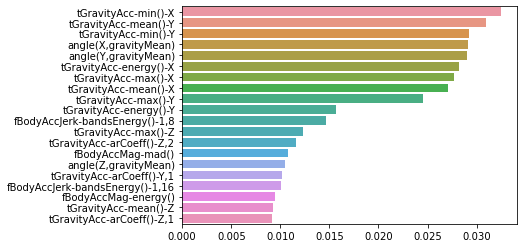

In [17]:
# 피처 중요도 값 추출
ftr_imp = rf_clf1.feature_importances_
# 시리즈 변환
ftr_imp_sr = pd.Series(
    ftr_imp
    ,index=X_train.columns
)
#중요도 정렬후 상위 20개 추출
ftr_top20 = ftr_imp_sr.sort_values(ascending=False)[:20]

sns.barplot(
    x=ftr_top20
    ,y=ftr_top20.index
)

### GBM(Gradient Boosting Machine)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [19]:
# 시작 시간
start_time = time.time()

# 모델 객체 생성
gb_clf =GradientBoostingClassifier(random_state=0)
#학습
gb_clf.fit(X_train,y_train)
#예측
gb_pred=gb_clf.predict(X_test)
#평가
gb_accu=accuracy_score(y_test,gb_pred)
#걸린시간
end_time=time.time()-start_time
#결과 출력
print('GBM 정확도 : {0:.4f}'.format(gb_accu))
print('GBM 수행 시간 : {0:.1f}'.format(end_time))

GBM 정확도 : 0.9389
GBM 수행 시간 : 642.8


### XGBoost

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier

In [21]:
# 버전 확인 
print(xgb.__version__)

0.90


### Native XGBoost 적용
- 데이터 셋 : 유방암 데이터 셋

In [22]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [24]:
# 데이터 추출
dataset = load_breast_cancer()
X_features = dataset.data #데이터
y_label = dataset.target # 답

In [25]:
# 데이터 프레임 생성
cancer_df = pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# 기존 데이터프레임에 답(target) 추가
cancer_df['target'] = y_label
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
# 악성(malignant),양성(benign) : 2진 분류
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [29]:
#학습/테스트 데이터 분리
X_train,X_test,y_train,y_test =\
train_test_split(
    X_features
    ,y_label
    ,test_size=0.2
    ,random_state=156
)

In [30]:
X_train.shape,X_test.shape

((455, 30), (114, 30))

In [40]:
# DMatrix : 데이터 변환
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest= xgb.DMatrix(data=X_test,label=y_test)

In [41]:
# 기본 셋팅
params ={
    'max_depth' : 3
    ,'eat' :0.1 #학습률
    ,'objective' : 'binary:logistic' # 이진분류
    ,'eval_metric' : 'logloss'
    , 'early_stopping' : 100
}

num_rounds = 400

In [42]:
# 'train' 학습시 사용 'eval' 평가시 사용
wlist = [(dtrain,'train'),(dtest,'eval')]

# 학습 진행
xgb_model = xgb.train(
      params=params # 파라미터
    , dtrain=dtrain # 학습할 데이터
    , num_boost_round=num_rounds # 모델 객체의 개수 400
    , evals=wlist # 평가
)

[0]	train-logloss:0.467749	eval-logloss:0.479838
[1]	train-logloss:0.335779	eval-logloss:0.362179
[2]	train-logloss:0.252541	eval-logloss:0.290041
[3]	train-logloss:0.195835	eval-logloss:0.233818
[4]	train-logloss:0.156638	eval-logloss:0.199014
[5]	train-logloss:0.126627	eval-logloss:0.174692
[6]	train-logloss:0.103527	eval-logloss:0.155492
[7]	train-logloss:0.085451	eval-logloss:0.133671
[8]	train-logloss:0.072771	eval-logloss:0.124106
[9]	train-logloss:0.06333	eval-logloss:0.116106
[10]	train-logloss:0.054842	eval-logloss:0.107679
[11]	train-logloss:0.04787	eval-logloss:0.100176
[12]	train-logloss:0.043336	eval-logloss:0.097538
[13]	train-logloss:0.037944	eval-logloss:0.089204
[14]	train-logloss:0.033084	eval-logloss:0.092592
[15]	train-logloss:0.029423	eval-logloss:0.09144
[16]	train-logloss:0.026893	eval-logloss:0.090663
[17]	train-logloss:0.024392	eval-logloss:0.090576
[18]	train-logloss:0.022263	eval-logloss:0.088944
[19]	train-logloss:0.02053	eval-logloss:0.086216
[20]	train-log

[164]	train-logloss:0.004711	eval-logloss:0.078201
[165]	train-logloss:0.004711	eval-logloss:0.078201
[166]	train-logloss:0.004711	eval-logloss:0.078201
[167]	train-logloss:0.004711	eval-logloss:0.078201
[168]	train-logloss:0.004711	eval-logloss:0.078201
[169]	train-logloss:0.004711	eval-logloss:0.078201
[170]	train-logloss:0.004711	eval-logloss:0.078201
[171]	train-logloss:0.004711	eval-logloss:0.078201
[172]	train-logloss:0.004711	eval-logloss:0.078201
[173]	train-logloss:0.004711	eval-logloss:0.078201
[174]	train-logloss:0.004711	eval-logloss:0.078201
[175]	train-logloss:0.004711	eval-logloss:0.078201
[176]	train-logloss:0.004711	eval-logloss:0.078201
[177]	train-logloss:0.004711	eval-logloss:0.078201
[178]	train-logloss:0.004711	eval-logloss:0.078201
[179]	train-logloss:0.004711	eval-logloss:0.078201
[180]	train-logloss:0.004711	eval-logloss:0.078201
[181]	train-logloss:0.004711	eval-logloss:0.078201
[182]	train-logloss:0.004711	eval-logloss:0.078201
[183]	train-logloss:0.004711	ev

[325]	train-logloss:0.004711	eval-logloss:0.078201
[326]	train-logloss:0.004711	eval-logloss:0.078201
[327]	train-logloss:0.004711	eval-logloss:0.078201
[328]	train-logloss:0.004711	eval-logloss:0.078201
[329]	train-logloss:0.004711	eval-logloss:0.078201
[330]	train-logloss:0.004711	eval-logloss:0.078201
[331]	train-logloss:0.004711	eval-logloss:0.078201
[332]	train-logloss:0.004711	eval-logloss:0.078201
[333]	train-logloss:0.004711	eval-logloss:0.078201
[334]	train-logloss:0.004711	eval-logloss:0.078201
[335]	train-logloss:0.004711	eval-logloss:0.078201
[336]	train-logloss:0.004711	eval-logloss:0.078201
[337]	train-logloss:0.004711	eval-logloss:0.078201
[338]	train-logloss:0.004711	eval-logloss:0.078201
[339]	train-logloss:0.004711	eval-logloss:0.078201
[340]	train-logloss:0.004711	eval-logloss:0.078201
[341]	train-logloss:0.004711	eval-logloss:0.078201
[342]	train-logloss:0.004711	eval-logloss:0.078201
[343]	train-logloss:0.004711	eval-logloss:0.078201
[344]	train-logloss:0.004711	ev

In [43]:
pred_probs = xgb_model.predict(dtest)

In [44]:
np.round(pred_probs[:10],3)

array([0.978, 0.004, 0.941, 0.048, 0.995, 1.   , 1.   , 1.   , 0.999,
       0.   ], dtype=float32)

In [45]:
preds = [1 if x >0.5 else 0 for x in pred_probs]
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [49]:
def get_clf_eval(y_test,pred):
    conf = confusion_matrix(y_test,pred) # 오차 행렬
    accu= accuracy_score(y_test,pred) # 정확도
    prec = precision_score(y_test,pred) # 정밀도
    recall_ = recall_score(y_test,pred) # 재현율
    f1 = f1_score(y_test,pred) # 정밀도,재현율 조합
    roc_auc = roc_auc_score(y_test,pred)
    
    print('오차 행렬')
    print(conf)
    
    out_str = '정확도 : {0:.4f},정밀도 : {1:.4f},\
    재현율 : {2:.4f},F1 : {3:.4f},AUC : {4:.4f}'
    
    print(out_str.format(accu,prec,recall_,f1,roc_auc))

In [50]:
get_clf_eval(y_test,preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737,정밀도 : 0.9744,    재현율 : 0.9870,F1 : 0.9806,AUC : 0.9665


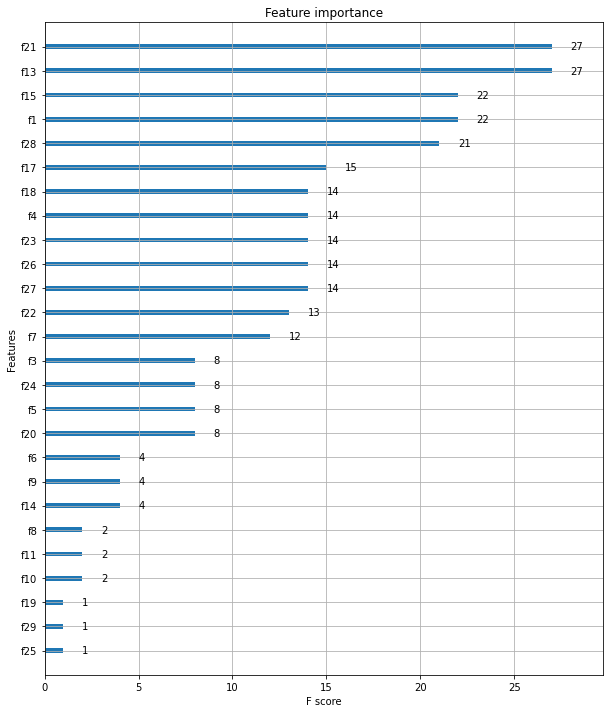

In [51]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax) # ax : 표시할 축

### Wrapper XGBoost

In [63]:
from xgboost import XGBClassifier

# 검증에 사용할 데이터/답 지정
evals=[(X_test,y_test)]

# 모델 객체 생성
xgb_wrap = XGBClassifier(
     n_estimators=400
    ,learning_rate=0.1
    ,max_depth =3
)


In [67]:
# 학습
xgb_wrap.fit(
      X_train
    , y_train
    , early_stopping_rounds=100
    , eval_set=evals  # 검증에 사용할 데이터/답
    , eval_metric = 'logloss' # 검증에 사용할 방법
    , verbose=True
)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

XGBClassifier(n_estimators=400)

In [68]:
w_preds = xgb_wrap.predict(X_test)

In [69]:
get_clf_eval(y_test,w_preds)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649,정밀도 : 0.9620,    재현율 : 0.9870,F1 : 0.9744,AUC : 0.9530


In [70]:
plot_importance(xgb_wrap,ax=ax)